In [2]:
import pandas as pd
df=pd.read_csv("GlobalLandTemperaturesByCity.csv.zip")
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [13]:
filtered_df = df[df['City'] == 'New York']
relevant_columns = filtered_df[['dt', 'AverageTemperature', 'AverageTemperatureUncertainty']]
print(relevant_columns.head())
relevant_columns.to_csv('filtered_aarhus_data.csv', index=False)


                 dt  AverageTemperature  AverageTemperatureUncertainty
5203973  1743-11-01               3.264                          1.665
5203974  1743-12-01                 NaN                            NaN
5203975  1744-01-01                 NaN                            NaN
5203976  1744-02-01                 NaN                            NaN
5203977  1744-03-01                 NaN                            NaN


Data type of 'dt' column: datetime64[ns]
Number of invalid dates: 0
Data type of 'dt' column after cleaning: datetime64[ns]


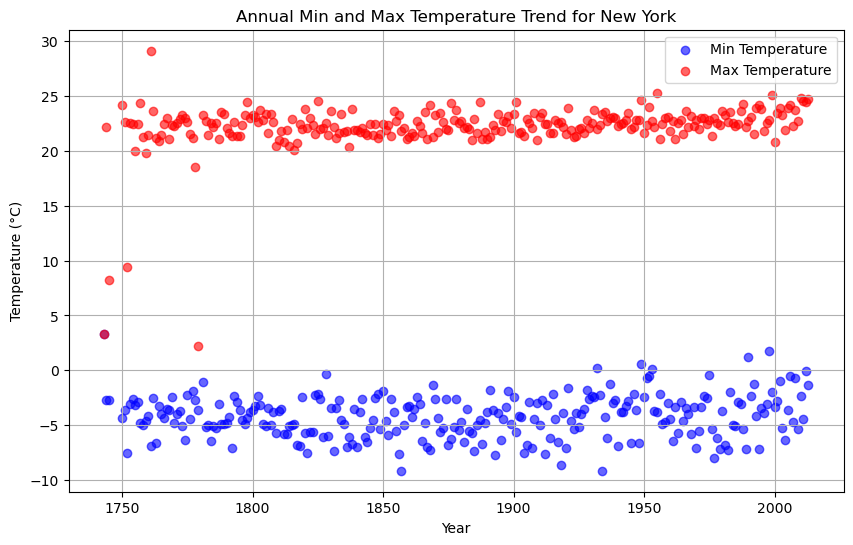

In [18]:
import matplotlib.pyplot as plt
ny_data = df[df['City'] == 'New York'].copy()
ny_data['dt'] = pd.to_datetime(ny_data['dt'], errors='coerce')
print(f"Data type of 'dt' column: {ny_data['dt'].dtype}")
print(f"Number of invalid dates: {ny_data['dt'].isna().sum()}")
ny_data = ny_data.dropna(subset=['dt'])
print(f"Data type of 'dt' column after cleaning: {ny_data['dt'].dtype}")
ny_data['Year'] = ny_data['dt'].dt.year
yearly_temp = ny_data.groupby('Year').agg(
    min_temp=('AverageTemperature', 'min'),
    max_temp=('AverageTemperature', 'max')
).reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(yearly_temp['Year'], yearly_temp['min_temp'], color='blue', label='Min Temperature', alpha=0.6)
plt.scatter(yearly_temp['Year'], yearly_temp['max_temp'], color='red', label='Max Temperature', alpha=0.6)

plt.title('Annual Min and Max Temperature Trend for New York')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()
